# Introductory examples

## 1.usa.gov data from bit.ly

In [78]:
%pwd

u'C:\\Users\\Deybi.Morales\\Documents\\Economia-Python'

In [79]:
path = 'C:\\Users\\Deybi.Morales\\Documents\\Economia-Python\\usagov_bitly_data2012-03-16-1331923249.txt'

In [80]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [81]:
import json
path = 'C:/Users/Deybi.Morales/Documents/Economia-Python/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [82]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [83]:
records[0]['tz']

u'America/New_York'

In [84]:
print(records[0]['tz'])

America/New_York


### Counting time zones in pure Python

In [85]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [86]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [87]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [88]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [89]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [90]:
counts = get_counts(time_zones)

In [91]:
counts['America/New_York']

1251

In [92]:
len(time_zones)

3440

In [93]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [94]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [95]:
from collections import Counter

In [96]:
counts = Counter(time_zones)

In [97]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### Counting time zones with pandas

In [98]:
%matplotlib inline

In [99]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [100]:
import json
path = 'C:/Users/Deybi.Morales/Documents/Economia-Python/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [101]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [102]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [103]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [104]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [105]:
plt.figure(figsize=(10, 4))

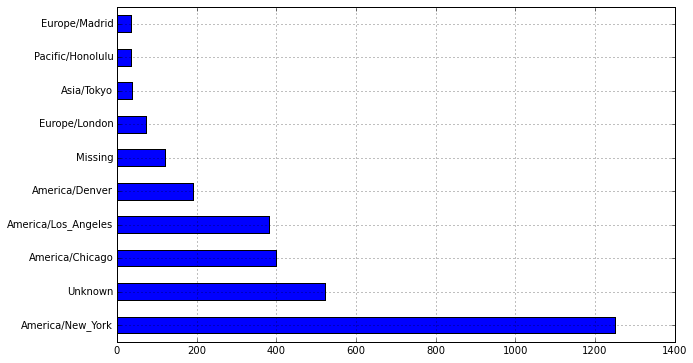

In [106]:
tz_counts[:10].plot(kind='barh', rot=0)

In [54]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [55]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [56]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [59]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [68]:
#Haciendo pruebas de las lineas anterior
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [69]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [70]:
cframe = frame[frame.a.notnull()]

In [71]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [73]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [75]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [76]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [77]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [78]:
plt.figure()

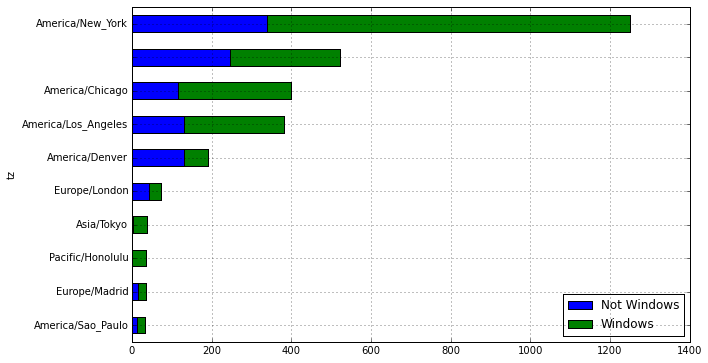

In [79]:
count_subset.plot(kind='barh', stacked=True)

In [80]:
plt.figure()

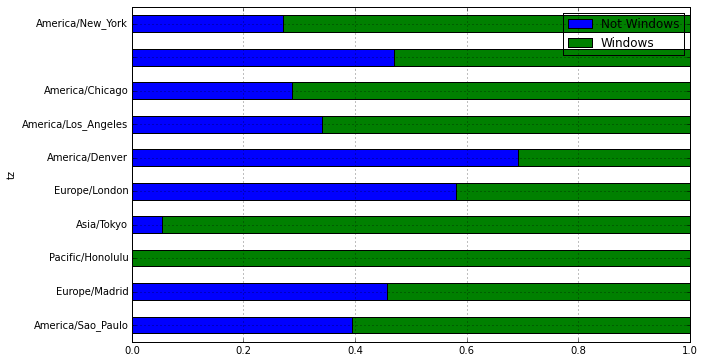

In [81]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [82]:
import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('C:/Users/Deybi.Morales/Documents/Economia-Python/users.dat')
rpath = os.path.expanduser('C:/Users/Deybi.Morales/Documents/Economia-Python/ratings.dat')
mpath = os.path.expanduser('C:/Users/Deybi.Morales/Documents/Economia-Python/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [84]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [85]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [86]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [87]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [89]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [90]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [104]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:15]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [97]:
#Modificado por mi parte para poder visualizar la variable cambiante
mean_ratings = data.pivot_table('age', index='title',
                                columns='rating', aggfunc='mean')
mean_ratings[:5]

rating,1,2,3,4,5
title,,,,,
"$1,000,000 Duck (1971)",31.000000,33.500000,31.066667,28.285714,32.000000
'Night Mother (1986),24.000000,35.500000,32.880000,31.833333,37.153846
'Til There Was You (1997),27.600000,30.600000,26.600000,31.400000,18.000000
"'burbs, The (1989)",27.277778,29.304348,29.130841,25.235294,26.782609
...And Justice for All (1979),53.000000,35.000000,34.092308,36.268293,38.026316


In [105]:
ratings_by_title = data.groupby('title').size()

In [106]:
ratings_by_title[:10] #Cambie a 10

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [107]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [108]:
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)'], dtype='object')

In [109]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [110]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [112]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

In [113]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [115]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [116]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [117]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [118]:
#Revertiendo manual para poner el orden según Hombres
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


### US Baby Names 1880-2010

In [46]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'C:\\Users\\Deybi.Morales\\Documents\\Economia-Python'

http://www.ssa.gov/oact/babynames/limits.html

In [ ]:
!head -n 10 ch02/names/yob1880.txt

In [47]:
import pandas as pd
names1880 = pd.read_csv('C:/Users/Deybi.Morales/Documents/Economia-Python/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [48]:
names1880.groupby('sex').births.sum()

sex
F       90993
M      110493
Name: births, dtype: int64

In [49]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'C:/Users/Deybi.Morales/Documents/Economia-Python/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [50]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [69]:
total_births.tail()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,3737,NaN,8279,NaN,NaN,297,NaN,404,440,...,NaN,5145,2839,530,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941,NaN,8914,NaN,NaN,313,NaN,349,468,...,NaN,4925,3028,526,NaN,NaN,NaN,NaN,NaN,NaN
2008,955,4028,219,8511,NaN,NaN,317,NaN,344,400,...,NaN,4764,3438,492,NaN,NaN,NaN,NaN,NaN,NaN
2009,1265,4352,270,7936,NaN,NaN,296,NaN,307,369,...,NaN,5120,3981,496,NaN,NaN,NaN,NaN,NaN,NaN
2010,448,4628,438,7374,226,NaN,277,NaN,295,324,...,NaN,6200,5164,504,NaN,NaN,NaN,NaN,NaN,258


In [110]:
total_births.plot(title='Total births by sex and year')

ValueError: width and height must each be below 32768

In [53]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [54]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [55]:
import numpy as np   #Agregué esto
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [56]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [57]:
top1000#Viendo el resultado

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [58]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [59]:
top1000.index = np.arange(len(top1000))

In [60]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing naming trends

In [61]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [62]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [63]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [64]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000824F1E80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000085E47048>], dtype=object)

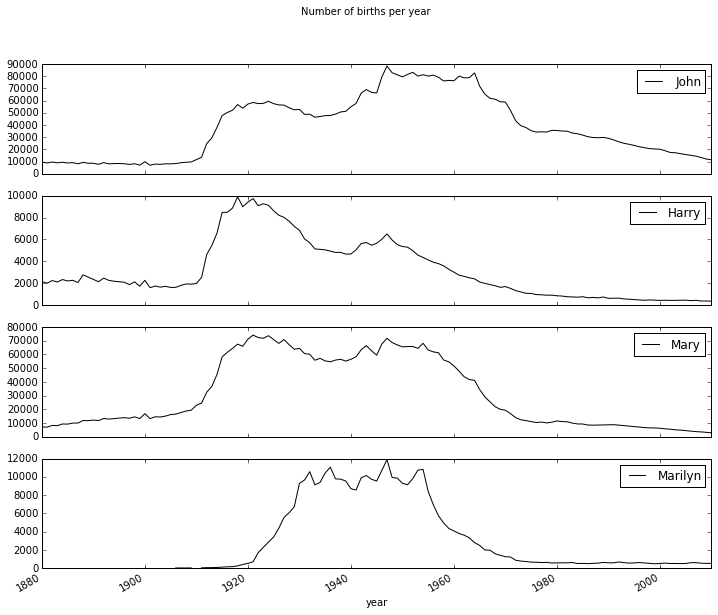

In [109]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [107]:
plt.figure()

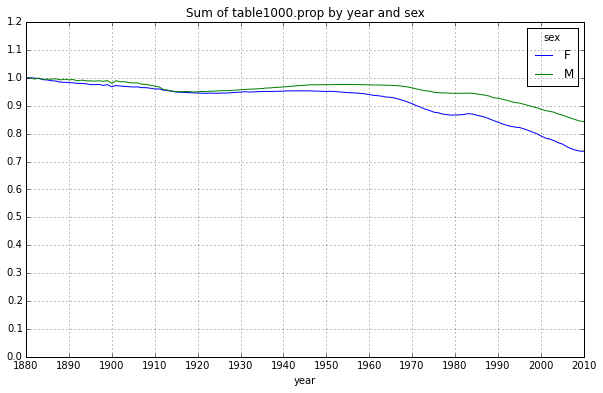

In [108]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [111]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [113]:
df.name  #Probando nombre de variables

260877          Jacob
260878          Ethan
260879        Michael
260880         Jayden
260881        William
260882      Alexander
260883           Noah
260884         Daniel
260885          Aiden
260886        Anthony
260887         Joshua
260888          Mason
260889    Christopher
260890         Andrew
260891          David
...
261862       Kadin
261863      Dillan
261864    Clarence
261865       Slade
261866     Clinton
261867     Sheldon
261868     Keshawn
261869    Menachem
261870      Joziah
261871      Bailey
261872      Camilo
261873      Destin
261874      Jaquan
261875      Jaydan
261876      Maxton
Name: name, Length: 1000, dtype: object

In [114]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [115]:
prop_cumsum.values.searchsorted(0.5)

116

In [116]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [117]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [118]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


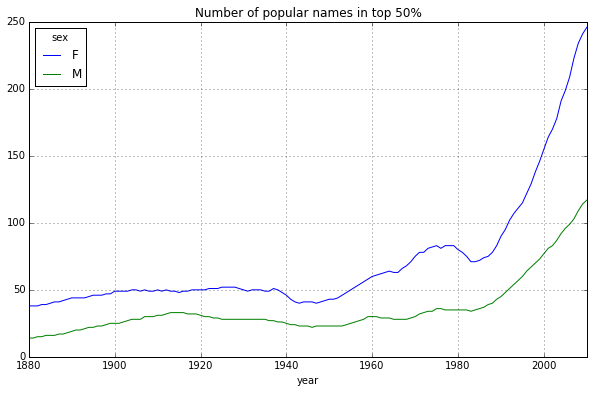

In [119]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [120]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [121]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()


sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [122]:
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [123]:
letter_prop = subtable / subtable.sum().astype(float)

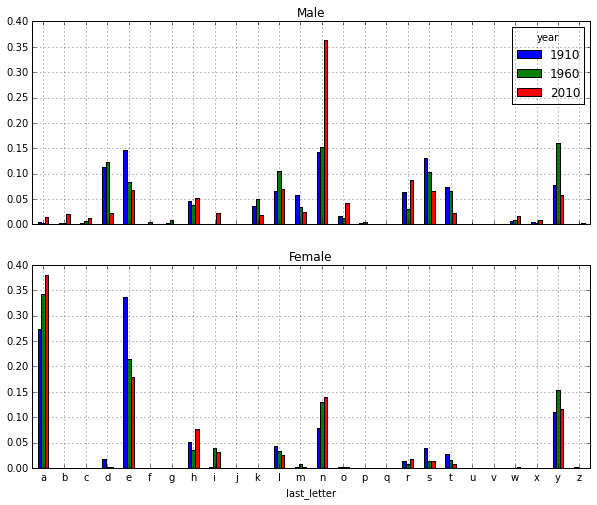

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
plt.close('all')

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})